In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx

data_df = pd.read_excel('ENB2012_data.xlsx')
data = np.array(data_df)

N = data.shape[0]
X = data[:,:8]
y = data[:,8]

kMax = 60

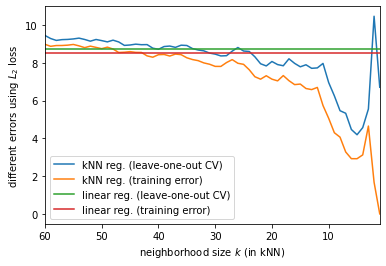

In [2]:
#plt.rcParams.update({'font.size': 16})
plt.figure()

# compute leave-one-out cross validation error for kNN regression
# and plot it

for s in list([0]):

    indices = list(range(N));
    indices_perm = np.random.permutation(indices)

    errors = np.zeros(kMax)

    for k in range(1,kMax+1):

        curr_error = 0

        for l in range(N):

            X_train = X[indices_perm]
            y_train = y[indices_perm]
            X_train = np.delete(X_train,[l],axis=0)
            y_train = np.delete(y_train,[l],axis=0)

            X_validate = X[indices_perm[l]]
            y_validate = y[indices_perm[l]]
            X_validate=[X_validate]
            y_validate=[y_validate]

            neigh = KNeighborsRegressor(n_neighbors=k)
            neigh.fit(X_train, y_train)
            y_prediction = neigh.predict(X_validate)
            curr_error = curr_error + (y_prediction-y_validate)**2

        errors[k-1] = curr_error/N

    plt.plot(np.linspace(1,kMax,kMax),errors,label="kNN reg. (leave-one-out CV)")


    
# compute training error for kNN regression and plot it

for s in list([0]):

    indices = list(range(N));
    indices_perm = np.random.permutation(indices)

    errors = np.zeros(kMax)

    for k in range(1,kMax+1):

        curr_error = 0

        X_train = X[indices_perm]
        y_train = y[indices_perm]

        neigh = KNeighborsRegressor(n_neighbors=k)
        neigh.fit(X_train, y_train)
        y_prediction = neigh.predict(X_train)
        curr_error = np.sum((y_prediction-y_train)**2)

        errors[k-1] = curr_error/N

    plt.plot(np.linspace(1,kMax,kMax),errors,label="kNN reg. (training error)")

    
# compute leave-one-out cross validation error for linear regression
# and plot it
    
curr_error = 0
for l in range(N):

    X_train = X
    y_train = y
    X_train = np.delete(X_train,[l],axis=0)
    y_train = np.delete(y_train,[l],axis=0)

    X_validate = X[l]
    y_validate = y[l]
    X_validate = [X_validate]
    y_validate = [y_validate]

    lin_regr = linear_model.LinearRegression()
    lin_regr.fit(X_train, y_train)
    y_prediction = lin_regr.predict(X_validate)
    curr_error = curr_error + (y_prediction-y_validate)**2

error_lin = curr_error/N

plt.plot(np.linspace(1,kMax,kMax),error_lin*np.ones(kMax),label="linear reg. (leave-one-out CV)")


# compute training error for linear regression and plot it

lin_regr = linear_model.LinearRegression()
lin_regr.fit(X, y)
y_prediction = lin_regr.predict(X)
lin_reg_training_error = sum((y_prediction-y)**2)/N

plt.plot(np.linspace(1,kMax,kMax),lin_reg_training_error*np.ones(kMax),label="linear reg. (training error)")



plt.legend()
plt.xlim(kMax,1)
plt.xlabel("neighborhood size $k$ (in kNN)")
plt.ylabel("different errors using $L_2$ loss")
#plt.title("error analysis for energy efficiency data set")
plt.show()